# Meta Methods

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import pandas as pd
import time

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv('games_clean.csv')

In [4]:
#data.drop(['RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip', 'Presence'], inplace=True, axis=1)
column = data.columns.get_loc('Metacritic')
y = data.iloc[:,column]
X = data.loc[:, data.columns != 'Metacritic']

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)




In [5]:
data.loc[:, data.columns != 'Metacritic']

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Web Publishing,Well-Written,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,41.0,2000.0,2017.0,5.99,0.0,0.0,450.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,25415.0,1000.0,2012.0,3.99,0.0,44.0,120.0,4.0,9.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1421.0,4000.0,2016.0,1.99,0.0,0.0,2000.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,257.0,4000.0,2013.0,9.99,0.0,20.0,12000.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,250.0,256.0,2017.0,4.99,0.0,0.0,312.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28.0,2000.0,2019.0,5.99,0.0,0.0,800.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9996,647.0,4000.0,2019.0,19.99,0.0,50.0,3000.0,11.0,2.0,8.0,...,False,False,False,False,False,False,False,False,False,False
9997,308.0,1000.0,2016.0,7.99,0.0,0.0,500.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9998,253.0,8000.0,2017.0,12.99,0.0,0.0,600.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


## Normalization
Data should be numerical and normalized or standarized

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
#X = scaler.transform(X)

## Voting scheme

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=25

clf1 = BernoulliNB(alpha=0.5, fit_prior=True)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(max_depth=13, criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
timeestamp=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest, max_depth=13, criterion = 'entropy',n_jobs=-1), X, y, cv=100, scoring='accuracy', n_jobs=-1)
    end = time.time()
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())
    timeestamp.append(end-start)

Accuracy: 0.360 [1]
Accuracy: 0.404 [2]
Accuracy: 0.447 [5]
Accuracy: 0.474 [10]
Accuracy: 0.496 [20]
Accuracy: 0.520 [50]
Accuracy: 0.529 [100]


[6.314144849777222, 4.533454179763794, 5.372032403945923, 6.694465160369873, 10.53135061264038, 19.109789848327637, 34.218701124191284]


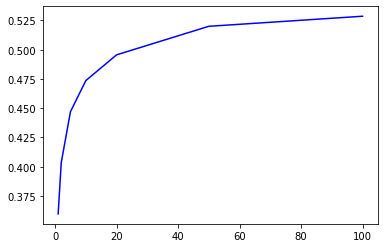

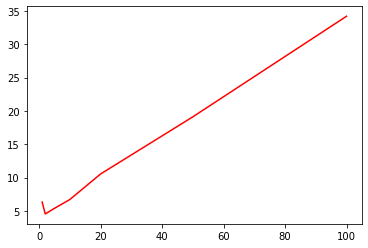

In [7]:
fig1, ax1 = plt.subplots()
ax1.plot([1,2,5,10,20,50,100],lrf, color='b')
fig2, ax2 = plt.subplots()
ax2.plot([1,2,5,10,20,50,100],timeestamp, color='r')
print(timeestamp)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
timeestamp=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest, max_depth=13, criterion = 'entropy', n_jobs=-1), X, y, cv=100, scoring='accuracy', n_jobs=-1)
    end = time.time()
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())
    timeestamp.append(end-start)

Accuracy: 0.322 [1]
Accuracy: 0.350 [2]
Accuracy: 0.385 [5]
Accuracy: 0.398 [10]
Accuracy: 0.416 [20]
Accuracy: 0.417 [50]
Accuracy: 0.418 [100]


[4.974161386489868, 5.228057384490967, 5.804358720779419, 7.4612414836883545, 11.139129400253296, 20.187734603881836, 36.68946099281311]


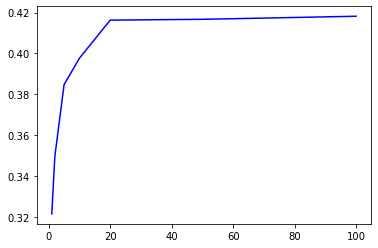

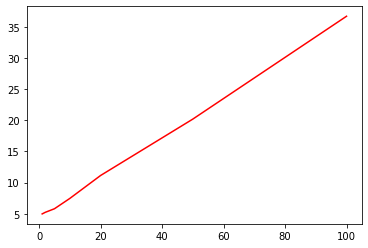

In [9]:
fig1, ax1 = plt.subplots()
ax1.plot([1,2,5,10,20,50,100],lext, color='b')
fig2, ax2 = plt.subplots()
ax2.plot([1,2,5,10,20,50,100],timeestamp, color='r')
print(timeestamp)

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=13, criterion = 'entropy'),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()